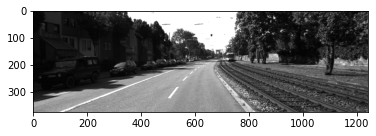

In [3]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/0000000008.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Normalizing the gray image
gray_image_normalised = gray_image.astype("float32")/255

plt.imshow(gray_image_normalised, cmap = 'gray')

plt.show()

In [4]:
import numpy as np

filter_values = np.array([[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1]])
print('Shape of filter:',filter_values.shape)

Shape of filter: (4, 4)


In [5]:
# Now creating four filters

filter_1 = filter_values
filter_2 = -filter_values
filter_3 = filter_values.T
filter_4 = -filter_values.T


print('\nFilter 1 :\n',filter_1)
print('\nFilter 2 :\n',filter_2)
print('\nFilter 3 :\n',filter_3)
print('\nFilter 4 :\n',filter_4)


Filter 1 :
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]

Filter 2 :
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]

Filter 3 :
 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]]

Filter 4 :
 [[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


In [6]:
# Putting all the four filters together
filters = np.array([filter_1, filter_2, filter_3, filter_4])
print('Shape of Filters: \n',filters.shape)

print('\nfilters :\n', filters)

Shape of Filters: 
 (4, 4, 4)

filters :
 [[[-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]]

 [[ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]]

 [[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [ 1  1  1  1]
  [ 1  1  1  1]]

 [[ 1  1  1  1]
  [ 1  1  1  1]
  [-1 -1 -1 -1]
  [-1 -1 -1 -1]]]


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        # The four filters created are passed as weights to this convolution network
        k_height, k_width = weight.shape[2:]
        # The four filters created are mentioned in the below layer and we are just visualizing convolutions so bias is given as false
        self.conv = nn.Conv2d(1,4, kernel_size=(k_height, k_width),bias = False)
        self.conv.weight = torch.nn.Parameter(weight)
        # A 4x4 pooling layer with a stride of 4
        self.pool = nn.MaxPool2d(4,4)
        
    def forward(self,x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        pooled_x = self.pool(activated_x)
        
        return conv_x, activated_x, pooled_x
    
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

model
        

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
)

In [8]:
def visualize_layer(layer, n_filters = 4):
    fig = plt.figure(figsize=(20,20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap = 'gray')
        ax.set_title('Output %s' %str(i+1))

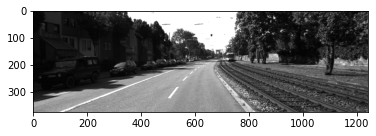

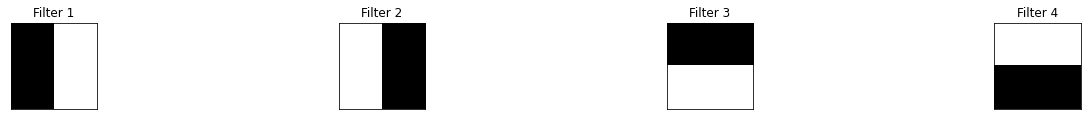

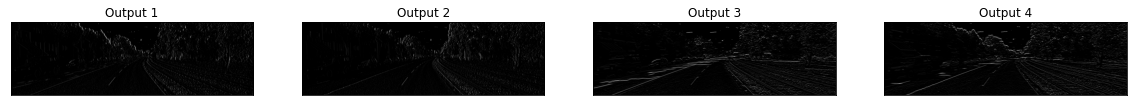

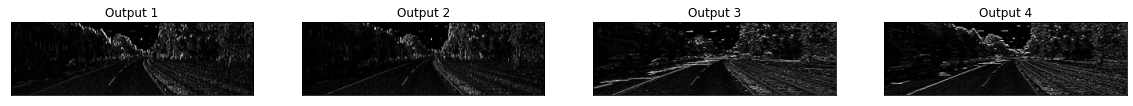

In [10]:
plt.imshow(gray_image_normalised, cmap ='gray')

fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0,right=1.5, bottom = 0.8, top = 1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_image_normalised).unsqueeze(0).unsqueeze(1)

# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of the activated conv layer
visualize_layer(activated_layer)

#Pooled Layer
visualize_layer(pooled_layer)